In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
folder1 = "database/raw/data_jupyternotebooks"
ligas = ["Bundesliga", "Ligue-1", "Premier"]
años = ["19-20", "20-21", "21-22", "22-23", "23-24"]
torneos = []

for liga in ligas:
    for año in años:
        match_file = f"stats_{año}.csv"
        try:
            path_matches = os.path.join(folder1, liga, match_file)
            matches = pd.read_csv(path_matches)
        except FileNotFoundError:
            continue
        torneos.append(matches)

In [3]:
for torneo in torneos:
    pd.set_option('display.max_rows', None)
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match                 0
team_home                       2
team_away                       2
home_score                      2
away_score                      2
posession_home                  2
posession_away                  2
total_shots_home                2
total_shots_away                2
shots_on_target_home            2
shots_on_target_away            2
shots_off_target_home           2
shots_off_target_away           2
blocked_shots_home              2
blocked_shots_away              2
corner_kicks_home               2
corner_kicks_away               2
offsides_home                  13
offsides_away                  13
fouls_home                      2
fouls_away                      2
yellow_cards_home              12
yellow_cards_away              12
red_cards_home                  2
red_cards_away                  2
free_kicks_home                 2
free_kicks_away                 2
throw_ins_home                308
throw_ins_away                308
goal_kicks_hom

Borrare los partidos de cada torneo en que no se hayan registrado los equipos que juegan

In [4]:

for torneo in torneos:
    torneo.dropna(subset=['team_home', 'team_away'], inplace=True)
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match                 0
team_home                       0
team_away                       0
home_score                      0
away_score                      0
posession_home                  0
posession_away                  0
total_shots_home                0
total_shots_away                0
shots_on_target_home            0
shots_on_target_away            0
shots_off_target_home           0
shots_off_target_away           0
blocked_shots_home              0
blocked_shots_away              0
corner_kicks_home               0
corner_kicks_away               0
offsides_home                  11
offsides_away                  11
fouls_home                      0
fouls_away                      0
yellow_cards_home              10
yellow_cards_away              10
red_cards_home                  0
red_cards_away                  0
free_kicks_home                 0
free_kicks_away                 0
throw_ins_home                306
throw_ins_away                306
goal_kicks_hom

Se borrarán todas las columnas que tengan datos faltantes en alguno de los torneos

In [5]:
columns_with_null = []

for torneo in torneos:
    null_columns = torneo.columns[torneo.isna().any()].tolist()
    columns_with_null.append(null_columns)

unique_columns = list(set(itertools.chain.from_iterable(columns_with_null)))
unique_columns

print(len(unique_columns))
print(unique_columns)
#Borrar para cada torneo las columnas en unique_columns
for torneo in torneos:
    torneo.drop(columns=unique_columns, inplace=True)

22
['offsides_home', 'big_chances_missed_home', 'big_chances_missed_away', 'possesion_lost_home', 'counter_attacks_shots_home', 'counter_attacks_shots_away', 'goalkeeper_saves_home', 'yellow_cards_home', 'clearences_home', 'throw_ins_home', 'goalkeeper_saves_away', 'hit_woodwork_away', 'yellow_cards_away', 'throw_ins_away', 'offsides_away', 'big_chances_home', 'counter_attacks_away', 'counter_attacks_home', 'clearences_away', 'hit_woodwork_home', 'big_chances_away', 'possesion_lost_away']


In [6]:
for torneo in torneos:
    print(torneo.isna().sum())
    print(torneo.isna().sum().sum())
    print("-----------------")

number_of_match           0
team_home                 0
team_away                 0
home_score                0
away_score                0
posession_home            0
posession_away            0
total_shots_home          0
total_shots_away          0
shots_on_target_home      0
shots_on_target_away      0
shots_off_target_home     0
shots_off_target_away     0
blocked_shots_home        0
blocked_shots_away        0
corner_kicks_home         0
corner_kicks_away         0
fouls_home                0
fouls_away                0
red_cards_home            0
red_cards_away            0
free_kicks_home           0
free_kicks_away           0
goal_kicks_home           0
goal_kicks_away           0
shots_inside_box_home     0
shots_inside_box_away     0
shots_outside_box_home    0
shots_outside_box_away    0
passes_home               0
passes_away               0
accurate_passes_home      0
accurate_passes_away      0
long_balls_home           0
long_balls_away           0
crosses_home        

In [7]:
torneos2 = []

for torneo in torneos:
    torneo.sort_values(by='number_of_match', inplace=True)
    torneo.rename(columns={'home_score': 'score_home', 'away_score': 'score_away'}, inplace=True)

    ##OJOO arreglar tema de equipos
    team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
    teams_to_remove = team_counts[team_counts < 5].index

    torneo = torneo[~(torneo['team_home'].isin(teams_to_remove) | torneo['team_away'].isin(teams_to_remove))]
    torneos2.append(torneo)


C:\Users\Diego\AppData\Local\Temp/ipykernel_11088/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_11088/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_11088/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_counts = torneo['team_home'].append(torneo['team_away']).value_counts()
C:\Users\Diego\AppData\Local\Temp/ipykernel_11088/2901177096.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fu

In [8]:
torneos = torneos2
torneos[0].head()

,number_of_match,team_home,team_away,score_home,score_away,posession_home,posession_away,total_shots_home,total_shots_away,shots_on_target_home,...,dribbles_home,dribbles_away,duels_won_home,duels_won_away,aerials_won_home,aerials_won_away,tackles_home,tackles_away,interceptions_home,interceptions_away
57,0,Bayern München,Hertha BSC,2.0,2.0,70.0,30.0,17.0,6.0,7.0,...,13.0,5.0,50.0,37.0,13.0,12.0,7.0,14.0,5.0,12.0
48,1,Bayer 04 Leverkusen,SC Paderborn 07,3.0,2.0,73.0,27.0,13.0,9.0,4.0,...,14.0,17.0,56.0,56.0,16.0,12.0,18.0,19.0,10.0,19.0
4,2,Borussia Dortmund,Augsburg,5.0,1.0,78.0,22.0,22.0,5.0,10.0,...,17.0,7.0,46.0,50.0,10.0,7.0,13.0,28.0,7.0,16.0
47,3,Freiburg,1. FSV Mainz 05,3.0,0.0,53.0,47.0,19.0,19.0,8.0,...,14.0,6.0,67.0,43.0,26.0,16.0,14.0,16.0,5.0,9.0
54,4,Werder Bremen,Fortuna Düsseldorf,1.0,3.0,66.0,34.0,24.0,12.0,10.0,...,5.0,6.0,46.0,44.0,20.0,15.0,9.0,16.0,5.0,11.0


Ahora se generara la tabla para cada torneo

In [9]:
def remove_suffix(item):
    return item.replace("_home", "").replace("_away", "")

column = [remove_suffix(item) for item in matches.columns]
columnas = []
[columnas.append(x) for x in column if x not in columnas]
columnas.remove("number_of_match")
columnas.remove("team")
columnas[0] = "score_prom"
print(columnas)
print(len(columnas))

['score_prom', 'posession', 'total_shots', 'shots_on_target', 'shots_off_target', 'blocked_shots', 'corner_kicks', 'fouls', 'red_cards', 'free_kicks', 'goal_kicks', 'shots_inside_box', 'shots_outside_box', 'passes', 'accurate_passes', 'long_balls', 'crosses', 'dribbles', 'duels_won', 'aerials_won', 'tackles', 'interceptions']
22


In [10]:
columnas.append("wins")
columnas.append("ties")
columnas.append("losses")
columnas.append("total_goals")
columnas.append("total_goals_conceded")
columnas.append("points")
columnas.append("streak")
columnas.append("wins_in_last_5_matches")
columnas.append("ties_in_last_5_matches")
columnas.append("losses_in_last_5_matches")

In [11]:
tablas = []

for torneo, i in zip(torneos, range(len(torneos))):
    
    equipos = torneo["team_home"].unique()
    equipos2 = torneo["team_away"].unique()
    print(len(equipos), len(equipos2))
    print(equipos)
    stats = columnas

    tabla = {}

    for equipo in equipos:

        tabla[equipo] = dict.fromkeys(stats, 0)
        tabla[equipo]["last_5_matches"] = list()

    tablas.append(tabla)

18 18
['Bayern München' 'Bayer 04 Leverkusen' 'Borussia Dortmund' 'Freiburg'
 'Werder Bremen' 'Wolfsburg' "Borussia M'gladbach" 'Eintracht Frankfurt'
 '1. FC Union Berlin' '1. FC Köln' '1. FSV Mainz 05' 'Augsburg'
 'Fortuna Düsseldorf' 'SC Paderborn 07' '1899 Hoffenheim' 'RB Leipzig'
 'Hertha BSC' 'FC Schalke 04']
18 18
['Bayern München' '1. FC Köln' '1. FC Union Berlin' 'Eintracht Frankfurt'
 'Werder Bremen' 'VfB Stuttgart' 'Borussia Dortmund' 'RB Leipzig'
 'VfL Wolfsburg' 'Hertha BSC' '1. FSV Mainz 05' 'Arminia Bielefeld'
 'Bayer 04 Leverkusen' "Borussia M'gladbach" 'FC Augsburg' 'FC Schalke 04'
 '1899 Hoffenheim' 'SC Freiburg']
18 18
["Borussia M'gladbach" '1. FC Union Berlin' 'Arminia Bielefeld'
 'FC Augsburg' 'VfB Stuttgart' 'VfL Wolfsburg' 'Borussia Dortmund'
 '1. FSV Mainz 05' '1. FC Köln' 'RB Leipzig' 'Eintracht Frankfurt'
 'Hertha BSC' 'SC Freiburg' 'SpVgg Greuther Fürth' 'VfL Bochum'
 'Bayer 04 Leverkusen' '1899 Hoffenheim' 'Bayern München']
23 23
['Eintracht Frankfurt' '1. F

In [12]:
new_stats = ["wins",
"ties",
"losses",
"total_goals",
"total_goals_conceded",
"points",
"streak",
"wins_in_last_5_matches",
"ties_in_last_5_matches",
"losses_in_last_5_matches"]
procesated_matches_columns = list(torneos[0].columns)
procesated_matches_columns.insert(5, "score_prom_away")
procesated_matches_columns.insert(5, "score_prom_home")

for stat in new_stats:
    procesated_matches_columns.append(f"{stat}_home")
    procesated_matches_columns.append(f"{stat}_away")

procesated_matches = pd.DataFrame(columns = procesated_matches_columns)

procesated_matches.head()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away


In [13]:
for torneo, i in zip(torneos, range(len(torneos))):
    tabla = tablas[i]
    for index in torneo.index:
    
        """Escribir info en el nuevo df de partidos con la información hasta el partido la cual esta almacenada en 'tabla'"""
        match = torneo.loc[index]
        team_home = match["team_home"]
        team_away = match["team_away"]

        stats_home = tabla[team_home]
        stats_away = tabla[team_away]

        fila = []
        fila.append(match["number_of_match"])
        fila.append(team_home)
        fila.append(team_away)
        fila.append(match["score_home"])
        fila.append(match["score_away"])

        for stat in stats:
            
            fila.append(tabla[team_home][stat])
            fila.append(tabla[team_away][stat])
        
        procesated_matches.loc[len(procesated_matches)] = fila
        
        """ Actualizar la tabla con lo que realmente ocurrió en ese partido"""

        matches_played_home = tabla[team_home]["wins"] + tabla[team_home]["ties"] + tabla[team_home]["losses"]+1
        matches_played_away = tabla[team_away]["wins"] + tabla[team_away]["ties"] + tabla[team_away]["losses"]+1
        
        ## stats promediadas:
        for stat in stats[:stats.index("wins")]:
            if stat == "score_prom":
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match["score_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match["score_away"])/matches_played_away
            else:
                tabla[team_home][stat] = (tabla[team_home][stat]*(matches_played_home-1) + match[f"{stat}_home"])/matches_played_home
                tabla[team_away][stat] = (tabla[team_away][stat]*(matches_played_away-1) + match[f"{stat}_away"])/matches_played_away
            
        ## stats acumuladas
        
        empate = False
        if match["score_home"] > match["score_away"]:

            #victorias / derrotas
            tabla[team_home]["wins"] += 1
            tabla[team_away]["losses"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 3

            # racha
            tabla[team_home]["streak"] += 1
            tabla[team_away]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_home]["last_5_matches"].append("W")
            tabla[team_away]["last_5_matches"].append("L")


        elif match["score_home"] < match["score_away"]:

            #victorias / derrotas
            tabla[team_away]["wins"] += 1
            tabla[team_home]["losses"] += 1

            #goles a favor
            tabla[team_away]["total_goals"] += match["score_away"]
            tabla[team_home]["total_goals"] += match["score_home"]

            #goles en contra
            tabla[team_away]["total_goals_conceded"] += match["score_home"]
            tabla[team_home]["total_goals_conceded"] += match["score_away"]

            #puntos
            tabla[team_away]["points"] += 3

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] = 0

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("W")
            tabla[team_home]["last_5_matches"].append("L")

        else:
            #empate
            tabla[team_home]["ties"] += 1
            tabla[team_away]["ties"] += 1

            #goles a favor
            tabla[team_home]["total_goals"] += match["score_home"]
            tabla[team_away]["total_goals"] += match["score_away"]

            #goles en contra
            tabla[team_home]["total_goals_conceded"] += match["score_away"]
            tabla[team_away]["total_goals_conceded"] += match["score_home"]

            #puntos
            tabla[team_home]["points"] += 1
            tabla[team_away]["points"] += 1

            # racha
            tabla[team_away]["streak"] += 1
            tabla[team_home]["streak"] += 1

            # ultimos 5 partidos
            if len(tabla[team_home]["last_5_matches"]) == 5:
                tabla[team_home]["last_5_matches"].pop(0)
            if len(tabla[team_away]["last_5_matches"]) == 5:
                tabla[team_away]["last_5_matches"].pop(0)

            tabla[team_away]["last_5_matches"].append("T")
            tabla[team_home]["last_5_matches"].append("T")

        tabla[team_home]["wins_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("W")
        tabla[team_home]["ties_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("T")
        tabla[team_home]["losses_in_last_5_matches"] = tabla[team_home]["last_5_matches"].count("L")

        tabla[team_away]["wins_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("W")
        tabla[team_away]["ties_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("T")
        tabla[team_away]["losses_in_last_5_matches"] = tabla[team_away]["last_5_matches"].count("L")

In [14]:
matches = procesated_matches

In [15]:
matches.tail()

,number_of_match,team_home,team_away,score_home,score_away,score_prom_home,score_prom_away,posession_home,posession_away,total_shots_home,...,points_home,points_away,streak_home,streak_away,wins_in_last_5_matches_home,wins_in_last_5_matches_away,ties_in_last_5_matches_home,ties_in_last_5_matches_away,losses_in_last_5_matches_home,losses_in_last_5_matches_away
3683,129,Everton,Manchester United,0.0,3.0,1.181818,1.083333,41.636364,54.250000,14.272727,...,13,21,2,2,3,4,0,0,2,1
3684,130,Fulham,Wolverhampton,3.0,2.0,0.833333,1.333333,48.750000,47.833333,11.083333,...,12,15,0,1,1,2,1,2,3,1
3685,131,Arsenal,Wolverhampton,2.0,1.0,2.076923,1.384615,61.230769,47.230769,14.538462,...,30,15,2,0,3,2,1,1,1,2
3686,132,Brentford,Luton Town,3.0,1.0,1.461538,0.923077,46.923077,35.769231,14.153846,...,16,9,0,1,3,1,0,2,2,2
3687,147,Aston Villa,Manchester City,1.0,0.0,2.384615,2.538462,52.538462,62.384615,14.923077,...,28,29,2,5,4,3,0,2,1,0


# ML

In [16]:
results = []

for index in matches.index:

    match = matches.loc[index]
    if match["score_home"] > match["score_away"]:
        results.append(1)
    elif match["score_home"] < match["score_away"]:
        results.append(2)
    else:
        results.append(0)

matches["result"] = results

In [17]:
for i in range(0,3):
    cantidad = matches[matches["result"]==i].shape[0]
    print(f"Resultado {i}, hay: {cantidad} partidos, {cantidad*100/len(matches)}%")

Resultado 0, hay: 883 partidos, 23.942516268980476%
Resultado 1, hay: 1605 partidos, 43.51952277657267%
Resultado 2, hay: 1200 partidos, 32.53796095444685%


In [18]:
# Separar el último torneo del resto

cant_partidos_ultima_temp = len(torneos[-1])

matches_train = matches.iloc[:-cant_partidos_ultima_temp]
matches_test = matches.iloc[-cant_partidos_ultima_temp:]
matches_train.shape, matches_test.shape

((3556, 70), (132, 70))

In [19]:
result_train = matches_train["result"]
result_test = matches_test["result"]
matches_train = matches_train.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "number_of_match"])
matches_test = matches_test.drop(columns = ["team_home", "team_away", "result", "score_home", "score_away", "number_of_match"])

matches_train.tail(), matches_test.tail()

(      score_prom_home  score_prom_away  posession_home  posession_away  \
 3551         0.891892         1.142857       42.702703       40.500000   
 3552         1.270270         1.783784       46.810811       50.000000   
 3553         1.324324         0.880000       47.648649       44.120000   
 3554         1.513514         1.459459       53.810811       48.675676   
 3555         0.864865         1.918919       44.837838       60.810811   
 
       total_shots_home  total_shots_away  shots_on_target_home  \
 3551         11.243243         11.142857              3.945946   
 3552         11.972973         13.702703              3.864865   
 3553         10.945946         12.880000              4.000000   
 3554         15.459459         11.324324              5.594595   
 3555         10.864865         15.540541              3.567568   
 
       shots_on_target_away  shots_off_target_home  shots_off_target_away  ...  \
 3551              4.000000               4.054054            

In [20]:
X = matches_train.to_numpy()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = result_train
X_test = scaler.transform(matches_test.to_numpy())
y_test = result_test

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter = 1000)
logistic_reg.fit(X_train, y_train)

predicted_logistic_reg = logistic_reg.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_logistic_reg))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.54      0.84      0.65        61
           2       0.49      0.37      0.42        46

    accuracy                           0.52       132
   macro avg       0.34      0.40      0.36       132
weighted avg       0.42      0.52      0.45       132



In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


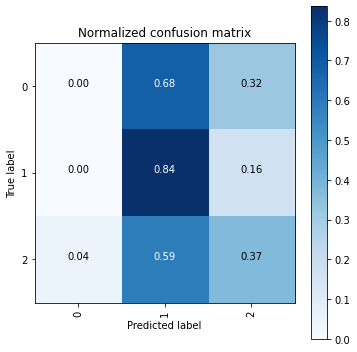

In [24]:
cnf_matrix = confusion_matrix(y_test, predicted_logistic_reg)
np.set_printoptions(precision=2)
classes = np.unique(y_train)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## SVM

In [25]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        f"For kernel = {kernel}, the accuracy is: {acc}"
    )


For kernel = linear, the accuracy is: 0.48484848484848486
For kernel = poly, the accuracy is: 0.4621212121212121
For kernel = rbf, the accuracy is: 0.5606060606060606
For kernel = sigmoid, the accuracy is: 0.5


In [26]:
from sklearn.svm import SVC

svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

predicted_svm = svm.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_svm))

Clasification report
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.56      0.80      0.66        61
           2       0.56      0.52      0.54        46

    accuracy                           0.56       132
   macro avg       0.54      0.46      0.43       132
weighted avg       0.55      0.56      0.51       132



Normalized confusion matrix


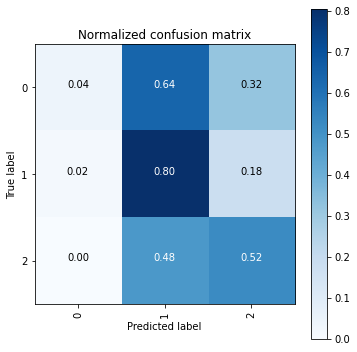

In [27]:
cnf_matrix = confusion_matrix(y_test, predicted_svm)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

range_T = [50, 100, 200, 500, 1000]


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=50, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 50 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=20, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 20 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=10, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 10 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


for t_ in range_T:
    clf = RandomForestClassifier(min_samples_split=5, n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(
        "For min_samples_split = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )


For min_samples_split = 50 and t = 50 The accuracy is : 0.5681818181818182
For min_samples_split = 50 and t = 100 The accuracy is : 0.5681818181818182
For min_samples_split = 50 and t = 200 The accuracy is : 0.5606060606060606
For min_samples_split = 50 and t = 500 The accuracy is : 0.553030303030303
For min_samples_split = 50 and t = 1000 The accuracy is : 0.553030303030303
For min_samples_split = 20 and t = 50 The accuracy is : 0.5454545454545454
For min_samples_split = 20 and t = 100 The accuracy is : 0.5378787878787878
For min_samples_split = 20 and t = 200 The accuracy is : 0.5454545454545454
For min_samples_split = 20 and t = 500 The accuracy is : 0.553030303030303
For min_samples_split = 20 and t = 1000 The accuracy is : 0.5606060606060606
For min_samples_split = 10 and t = 50 The accuracy is : 0.49242424242424243
For min_samples_split = 10 and t = 100 The accuracy is : 0.5303030303030303
For min_samples_split = 10 and t = 200 The accuracy is : 0.5454545454545454
For min_samples

In [29]:
rf = RandomForestClassifier(min_samples_split=50, n_estimators=50, random_state=0)

rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)
print("Clasification report")
print(classification_report(y_test, predicted_rf))

Clasification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.57      0.87      0.69        61
           2       0.56      0.48      0.52        46

    accuracy                           0.57       132
   macro avg       0.38      0.45      0.40       132
weighted avg       0.46      0.57      0.50       132



c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Diego\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Normalized confusion matrix


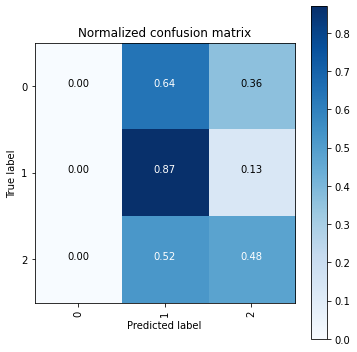

In [30]:
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()

## MLP

In [31]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Embedding, Concatenate
from tensorflow.keras.models import Model

mlp = Sequential([
    Input(shape = X_train[0].shape[0]),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation= "relu"),
    Dense(3, activation = "softmax")
])

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 18755 (73.26 KB)
Trainable params: 18755 (73.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3) # Conjunto de validación = 0.8*0.25 = 0.2, este valor es estándar para validación

y_train2 = keras.utils.to_categorical(y_train2, 3)
y_val = keras.utils.to_categorical(y_val, 3)
y_test = keras.utils.to_categorical(y_test, 3)

In [33]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Ajusta la función de pérdida según el tipo de problema categorical es para multi clases
mlp.fit(X_train2, y_train2, batch_size=256, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


11/11 [==============================] - 1s 19ms/step - loss: 1.0566 - accuracy: 0.4526 - val_loss: 1.0338 - val_accuracy: 0.4949
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 1.0073 - accuracy: 0.5073 - val_loss: 1.0169 - val_accuracy: 0.5017
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9901 - accuracy: 0.5186 - val_loss: 1.0117 - val_accuracy: 0.5141
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9752 - accuracy: 0.5257 - val_loss: 1.0123 - val_accuracy: 0.5073
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9629 - accuracy: 0.5377 - val_loss: 1.0123 - val_accuracy: 0.5118
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9498 - accuracy: 0.5463 - val_loss: 1.0128 - val_accuracy: 0.5073
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.9389 - accuracy: 0.5553 - val_loss: 1.0148 - val_accuracy: 0.4983
Epoch 8/100
11/11 [=====

In [34]:
predicted_mlp = mlp.predict(X_test)
predicted_mlp = [np.argmax(x) for x in predicted_mlp]
y_test = [np.argmax(x) for x in y_test]

5/5 [==============================] - 0s 1ms/step


In [35]:
print("Clasification report")
print(classification_report(y_test, predicted_mlp))

Clasification report
              precision    recall  f1-score   support

           0       0.20      0.32      0.25        25
           1       0.60      0.43      0.50        61
           2       0.45      0.48      0.46        46

    accuracy                           0.42       132
   macro avg       0.42      0.41      0.40       132
weighted avg       0.47      0.42      0.44       132



Normalized confusion matrix


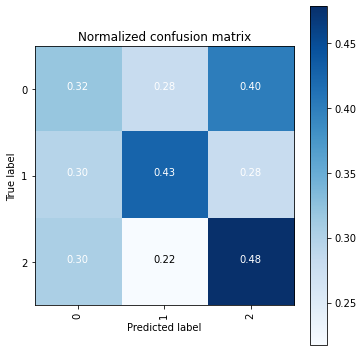

In [36]:
cnf_matrix = confusion_matrix(y_test, predicted_mlp)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, title='Normalized confusion matrix')

plt.show()